In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport # profile report を作る用
from matplotlib_venn import venn2 # venn図を作成する用

pd.set_option("display.max_columns", 1200)
pd.set_option("display.max_rows", 1200)

In [3]:
train_df = pd.read_csv("../../Data/train.csv")
test_df = pd.read_csv("../../Data/test.csv")

sales_cols = [col for col in train_df.columns if "Sales" in col]
print(train_df.shape)
print(test_df.shape)

(8359, 16)
(8360, 11)


In [4]:
train_df[:5]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [5]:
test_df[:5]

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M


## trainにもtestにもいるdeveloper

In [6]:
tr_devs =train_df["Developer"].unique()
te_devs = test_df["Developer"].unique()

train_df[train_df["Developer"].isin(te_devs)][:100]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+
5,LEGO Harry Potter: Years 5-7,X360,NaN,Action,Warner Bros. Interactive Entertainment,51,37,0,9,97,77.0,35.0,7.9,39.0,Traveller's Tales,E10+
7,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,36,41,0,15,91,76.0,27.0,8.3,48.0,Traveller's Tales,E10+
8,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,52,24,0,8,84,61.0,48.0,7.4,113.0,Snowblind Studios,M
9,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,25,42,1,13,82,63.0,33.0,7,100.0,Snowblind Studios,M
10,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,Disney Interactive Studios,48,18,0,1,67,66.0,7.0,6.8,5.0,Amaze Entertainment,E


In [7]:
train_df["Rating"].value_counts()
# E10+ 10才以上
# T 13才以上
# E 全年齢対象
# M 17才以上
# RP まだついてない
# EC おそらく子供向け
# AO 大人向け
# K-A わからない

E       1880
T       1404
M        772
E10+     731
EC         8
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64

In [8]:
train_df.groupby("Rating").mean()[sales_cols]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rating,,,,,
AO,126.000000,61.000000,0.000000,9.000000,195.000000
E,40.858511,22.201064,9.218085,6.859043,79.170745
E10+,25.815321,13.833105,4.852257,5.668947,50.160055
EC,19.125000,1.375000,0.000000,1.375000,22.125000
K-A,26.000000,16.000000,146.000000,3.000000,192.000000
M,49.340674,30.253886,4.761658,12.018135,96.410622
RP,0.000000,3.000000,0.000000,1.000000,3.000000
T,24.622507,12.972222,7.970085,5.212963,50.841880


In [9]:
train_df.groupby("Genre").mean()[sales_cols]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,30.986804,17.488812,5.831899,6.660929,61.011474
Adventure,9.755735,6.102564,5.064777,1.526316,22.448043
Fighting,30.256818,13.197727,13.200000,5.243182,61.950000
Misc,24.959116,14.818785,8.622099,5.083978,53.525967
Platform,67.467257,29.332743,21.440708,7.646018,125.927434
Puzzle,29.936170,11.765957,13.668693,2.799392,58.215805
Racing,41.419048,24.836190,9.573333,8.504762,84.382857
Role-Playing,26.625000,14.842105,32.769737,4.767544,79.020833
Shooter,45.601027,18.647260,3.363014,6.003425,73.678082


In [10]:
train_df["Global_Sales"].value_counts().sort_index()

1       316
2       548
3       407
4       314
5       305
6       262
7       264
8       227
9       235
10      194
11      199
12      160
13      163
14      170
15      148
16      115
17      132
18      104
19      124
20      112
21       97
22       78
23       91
24       79
25       92
26       90
27       77
28      148
30       53
31       59
32       57
33       65
34       52
35       52
36       40
37       46
38       53
39       46
40       53
41       50
42       52
43       44
44       47
45       50
46       40
47       34
48       25
49       34
50       38
51       31
52       30
53       35
54       31
55       32
56       59
57       24
59       23
60       29
61       30
62       23
63       20
64       24
65       28
66       24
67       15
68       19
69       13
70       17
71       13
72       17
73       19
74       20
75       16
76       25
77       19
78       17
79       15
80       10
81       13
82       11
83       11
84       15
85        9
86  

In [11]:
train_df["Global_Sales"].quantile(0.5)

18.0

<AxesSubplot:>

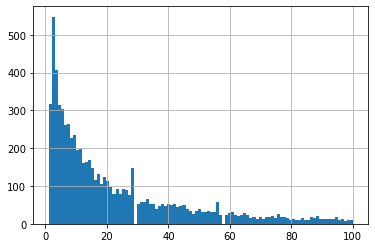

In [12]:
train_df[train_df["Global_Sales"] <= 100]["Global_Sales"].hist(bins=100)

In [13]:
from sklearn.metrics import mean_squared_log_error
train_preds = pd.read_csv("../Experiments/exp_000/train_preds.csv")

print(mean_squared_log_error(train_preds["Global_Sales"], train_df["Global_Sales"]))

train_df["pred"] = train_preds["Global_Sales"]
train_df["err"] = train_df.apply(lambda x : (np.log1p(x["Global_Sales"]) - np.log1p(x["pred"]))**2, axis=1)

0.9820027640249348


In [14]:
train_df.sort_values("err", ascending=False)[:100]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,pred,err
3075,Nintendogs,DS,2005.0,Simulation,Nintendo,905,1095,193,274,2467,NaN,NaN,NaN,NaN,NaN,NaN,17.560189,23.913513
3487,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,638,446,604,136,1825,NaN,NaN,NaN,NaN,NaN,NaN,14.459363,22.768817
6121,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,551,317,565,80,1514,NaN,NaN,NaN,NaN,NaN,NaN,15.980598,20.169973
594,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,1127,889,1022,100,3137,NaN,NaN,NaN,NaN,NaN,NaN,38.402652,19.162575
5017,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,434,271,396,76,1177,NaN,NaN,NaN,NaN,NaN,NaN,15.074795,18.441192
1717,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,606,390,538,50,1585,NaN,NaN,NaN,NaN,NaN,NaN,22.017948,17.915716
7393,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,528,419,434,78,1460,NaN,NaN,NaN,NaN,NaN,NaN,22.837803,16.938194
1039,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,900,618,720,71,2310,NaN,NaN,NaN,NaN,NaN,NaN,37.741315,16.716070
214,Tetris,GB,1989.0,Puzzle,Nintendo,2320,225,422,57,3026,NaN,NaN,NaN,NaN,NaN,NaN,55.597558,15.835318
164,Duck Hunt,NES,1984.0,Shooter,Nintendo,2693,63,28,47,2831,NaN,NaN,NaN,NaN,NaN,NaN,52.464491,15.758683


In [15]:
train_df.sort_values("err", ascending=False)[train_df["Global_Sales"] < 10][:20]

/home/ubuntu/miniconda3/envs/ML2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,pred,err
5830,Darksiders,PS3,2010.0,Action,THQ,1,0,0,0,2,82.0,73.0,7.9,319.0,Vigil Games,M,121.898099,13.784463
4698,Banjo-Kazooie,X360,2008.0,Platform,Microsoft Game Studios,0,1,0,0,1,77.0,17.0,8.2,70.0,4J Studios,E,54.278060,11.017281
7602,Infamous: First Light,PS4,2014.0,Action,Sony Computer Entertainment,0,3,0,0,3,73.0,70.0,7.5,580.0,Sucker Punch,T,80.279143,9.069705
4696,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,31.354247,7.748418
3768,Sengoku Basara 2 Heroes,Wii,2007.0,Action,Capcom,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,29.933373,7.500414
2887,Electroplankton,DS,2005.0,Misc,Nintendo,1,0,2,0,3,71.0,49.0,7,37.0,Indies Zero,E,60.156139,7.437270
8192,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0,1,0,0,1,81.0,46.0,8.5,151.0,Shin'en,E,29.014653,7.336181
650,Victory Spike,PS,1996.0,Sports,Imagineer,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,25.935390,6.761528
7291,DuckTales: Remastered,PS3,2013.0,Action,Capcom,1,3,0,1,5,75.0,31.0,7.4,135.0,WayForward,E,79.451182,6.738651
1656,Peter Pan in Disney's Return to Never Land,PS,2002.0,Platform,Sony Computer Entertainment,1,1,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,39.095627,6.721860


In [ ]:
train_df["Platform"].value_counts()

In [ ]:
test_df.sort_values("")